In [ ]:
import pandas as pd

# Replace 'your_data.csv' with the path to your dataset
df = pd.read_csv('..\\data_files\\csv_dfs\\audio_features_with_scores.csv')


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_9316\960027282.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data_csv_files\\audio_features_with_scores.csv')


In [8]:
print(df.head())
print(df.info())
print(df.describe())



               artist_names       track_name  \
0  Bagossy Brothers Company          Olyan Ő   
1                    Eminem       Without Me   
2        Dzsúdló, Lil Frakk              Lej   
3               Halott Pénz  Amikor Feladnád   
4                The Weeknd  Blinding Lights   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:0VTjzV78c7fn1uo1ApOSkg         0.775   0.510    5    -6.043   
1  spotify:track:7lQ8MOhq6IN2w8EYcFNSUk         0.908   0.669    7    -2.827   
2  spotify:track:4FATnhRDq5PbfkZMafDuxb         0.790   0.503    1    -9.301   
3  spotify:track:5pZDYdwuEWlCT2Rs7mNyvW         0.737   0.810    1    -3.683   
4  spotify:track:0sf12qNH5qcw8qpgymFOqD         0.512   0.796    1    -4.075   

   mode  speechiness  acousticness  ...  popularity_score1  popularity_score2  \
0     1       0.0303       0.18500  ...           0.032332           0.079022   
1     1       0.0738       0.00286  ...           0.017148          

# Check correlation between features to filter out some of them

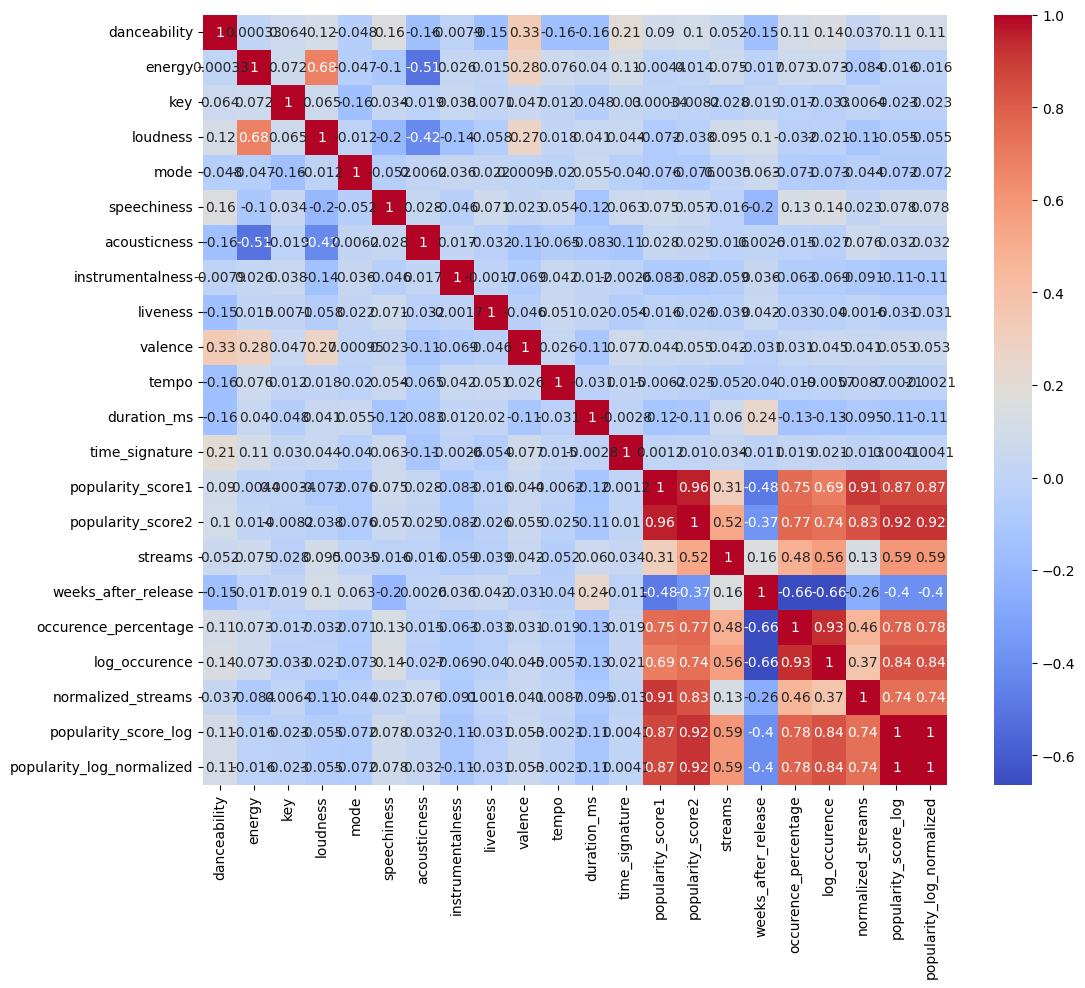

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numerical_columns]

corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()





# Check audio features correlataion with the popularity score.

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numerical_columns].corr()['popularity_log_normalized']
correlations = correlations.drop(['popularity_log_normalized', 'streams', "log_occurence", "popularity_score1", "popularity_score2", "weeks_after_release", "normalized_streams", "occurence_percentage", "popularity_score_log"])
sorted_correlations = correlations.sort_values()
print(sorted_correlations)


instrumentalness   -0.109884
duration_ms        -0.106141
mode               -0.071797
loudness           -0.054975
liveness           -0.031063
key                -0.023051
energy             -0.016041
tempo              -0.002133
time_signature      0.004102
acousticness        0.032009
valence             0.052996
speechiness         0.078084
danceability        0.109732
Name: popularity_log_normalized, dtype: float64


# Drop the features (and everything unnecessary) with around 0 correlation (tempo, energy, time_signature, key)

In [ ]:
df.rename(columns={df.columns[-1]: 'popularity'}, inplace=True)
input_data = df.drop(['streams', "log_occurence", "popularity_score1", "popularity_score2", "weeks_after_release", "normalized_streams", "occurence_percentage", "popularity_score_log", "tempo", "energy", "key", "time_signature", "release_week", "id", "analysis_url", "uri", "type", "track_href"], axis=1)
input_data.to_csv('..\\data_files\\csv_dfs\\input_data.csv', index=False)
print(input_data.head())


               artist_names       track_name  danceability  loudness  mode  \
0  Bagossy Brothers Company          Olyan Ő         0.775    -6.043     1   
1                    Eminem       Without Me         0.908    -2.827     1   
2        Dzsúdló, Lil Frakk              Lej         0.790    -9.301     1   
3               Halott Pénz  Amikor Feladnád         0.737    -3.683     1   
4                The Weeknd  Blinding Lights         0.512    -4.075     1   

   speechiness  acousticness  instrumentalness  liveness  valence  \
0       0.0303       0.18500          0.000000    0.1230    0.525   
1       0.0738       0.00286          0.000000    0.2370    0.662   
2       0.2060       0.52700          0.000000    0.1100    0.241   
3       0.0772       0.03910          0.000000    0.0908    0.407   
4       0.0645       0.00147          0.000209    0.0938    0.344   

   duration_ms  popularity  
0       226500   76.220257  
1       290320   57.163727  
2       168800   76.390781  


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_9316\2728968943.py:3: SyntaxWarning: invalid escape sequence '\d'
  input_data.to_csv('..\data_csv_files\input_data.csv', index=False)


# Cluster the popularity scores from 0-100 to 1-10.

In [ ]:
bins = list(range(0, 101, 10))  # [0, 10, 20, ..., 100]
labels = list(range(1, 11))  # [1, 2, 3, ..., 10]
binned_df  = pd.read_csv('..\\data_files\\csv_dfs\\input_data.csv')
binned_df['popularity_cluster'] = pd.cut(binned_df['popularity'], bins=bins, labels=labels, right=False)
binned_df.to_csv('..\\data_files\\csv_dfs\\input_data_binned.csv', index=False)
print(binned_df.head())


               artist_names       track_name  danceability  loudness  mode  \
0  Bagossy Brothers Company          Olyan Ő         0.775    -6.043     1   
1                    Eminem       Without Me         0.908    -2.827     1   
2        Dzsúdló, Lil Frakk              Lej         0.790    -9.301     1   
3               Halott Pénz  Amikor Feladnád         0.737    -3.683     1   
4                The Weeknd  Blinding Lights         0.512    -4.075     1   

   speechiness  acousticness  instrumentalness  liveness  valence  \
0       0.0303       0.18500          0.000000    0.1230    0.525   
1       0.0738       0.00286          0.000000    0.2370    0.662   
2       0.2060       0.52700          0.000000    0.1100    0.241   
3       0.0772       0.03910          0.000000    0.0908    0.407   
4       0.0645       0.00147          0.000209    0.0938    0.344   

   duration_ms  popularity popularity_cluster  
0       226500   76.220257                  8  
1       290320   57.

# Process Data --> Prepare X and Y data, test and train data, scale data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = binned_df.drop(['popularity', 'popularity_cluster', "artist_names", "track_name"], axis=1)
y = binned_df['popularity_cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# I want to save X_train, X_test, y_train, y_test for later use
import pickle
with open('..\\data_files\\test_and_train_data\\X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('..\\data_files\\test_and_train_data\\X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('..\\data_files\\test_and_train_data\\y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('..\\data_files\\test_and_train_data\\y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
